In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
User_Gameplay_Data = pd.read_excel("Analytics Position Case Study.xlsx", sheet_name="User Gameplay data", skiprows=3)
Deposit_Data = pd.read_excel("Analytics Position Case Study.xlsx", sheet_name="Deposit Data", skiprows=3)
Withdrawal_Data = pd.read_excel("Analytics Position Case Study.xlsx", sheet_name="Withdrawal Data", skiprows=3)

In [16]:
Withdrawal_Data.groupby('User Id').agg({
    'Amount':['sum','mean'],
    'User Id':'count'
})

Amount               User Id
             sum          mean   count
User Id                               
2        1270215  63510.750000      20
5          32700   3633.333333       9
7           6617   6617.000000       1
9         171456  19050.666667       9
11        101500   4229.166667      24
...          ...           ...     ...
980        87900   2441.666667      36
985       155000   8157.894737      19
987       135650   5897.826087      23
989      1339000  66950.000000      20
992       616278  56025.272727      11

[514 rows x 3 columns]

In [ ]:
User_Gameplay_Data.count()
Deposit_Data.count()
Withdrawal_Data.count()

User Id     3566
Datetime    3566
Amount      3566
dtype: int64

In [43]:
User_Gameplay_Data.rename(columns={'User ID': 'User Id'}, inplace=True)

In [170]:
monthly_groups = Withdrawal_Data.groupby(Withdrawal_Data['Datetime'].dt.to_period('M'))
monthly_groups.count()
User_Gameplay_Data.loc[User_Gameplay_Data['Datetime'] == '2022-10-10']

,User Id,Games Played,Datetime
103487,565,1,2022-10-10
103488,989,1,2022-10-10
103489,887,1,2022-10-10
103490,618,1,2022-10-10


Changing Data Types

In [44]:
User_Gameplay_Data['Datetime'] = pd.to_datetime(User_Gameplay_Data['Datetime'])
Deposit_Data['Datetime'] = pd.to_datetime(Deposit_Data['Datetime'])
Withdrawal_Data['Datetime'] = pd.to_datetime(Withdrawal_Data['Datetime'])

User_Gameplay_Data['User Id'] = User_Gameplay_Data['User Id'].astype('str')
Deposit_Data['User Id'] = Deposit_Data['User Id'].astype('str')
Withdrawal_Data['User Id'] = Withdrawal_Data['User Id'].astype('str')

In [ ]:
# Withdrawal_Data.loc[Withdrawal_Data['Datetime']>= '2022-10-01'].count()
# User_Gameplay_Data

,User Id,Games Played,Datetime
0,851,1,2022-01-10 00:00:00
1,717,1,2022-01-10 00:00:00
2,456,1,2022-01-10 00:00:00
3,424,1,2022-01-10 00:00:00
4,845,1,2022-01-10 00:00:00
...,...,...,...
355261,658,1,2022-10-31 23:59:00
355262,582,1,2022-10-31 23:59:00
355263,272,1,2022-10-31 23:59:00
355264,563,1,2022-10-31 23:59:00


In [ ]:
# Calculating Loyalty point for 2nd October - Slot S1
# Date_Start = pd.Timestamp('2022-02-10 00:00:00')
# Date_End = pd.Timestamp('2022-02-10 12:00:00')

Creating a function to filter the data for a given date and time and group values per User 

In [ ]:
def Date_Slots(x,y):
    games_Oct_2 = User_Gameplay_Data[(User_Gameplay_Data['Datetime'] >= x) & (User_Gameplay_Data['Datetime'] <y )] 
    deposit_Oct_2 = Deposit_Data[(Deposit_Data['Datetime']>= x) & (Deposit_Data['Datetime'] < y)] 
    Withdraw_Oct_2 = Withdrawal_Data[(Withdrawal_Data['Datetime']>= x) & (Withdrawal_Data['Datetime'] < y)]

    gameplay_per_user = games_Oct_2.groupby('User Id')['Games Played'].sum().reset_index()
    gameplay_per_user.columns = ['User Id', 'Games_Played']
    gameplay_per_user

    deposit_sum = deposit_Oct_2.groupby('User Id')['Amount'].sum().rename('Deposit_Amount')
    deposit_count = deposit_Oct_2.groupby('User Id')['User Id'].count().rename("Total_Deposits")
    deposit_per_user = pd.merge(deposit_sum, deposit_count, on='User Id', how='outer')
    deposit_per_user
     
    withdrawal_sum = Withdraw_Oct_2.groupby('User Id')['Amount'].sum().rename('Withdrawal_Amount')
    withdrawal_count = Withdraw_Oct_2.groupby('User Id')['User Id'].count().rename('Total_Withdrawal')
    withdrawal_per_user = pd.merge(withdrawal_sum, withdrawal_count, on='User Id', how='outer')
    withdrawal_per_user

    All_data = gameplay_per_user.merge(deposit_per_user, on='User Id', how='outer') 
    All_data = All_data.merge(withdrawal_per_user, on='User Id', how='outer')

    All_data = All_data.astype({
        'User Id':'str',
        'Games_Played':'Int64',
        'Deposit_Amount':'float64',
        'Total_Deposits':'Int64',
        'Withdrawal_Amount':'float64',
        'Total_Withdrawal':'Int64' 
    })

    All_data.fillna(0, inplace = True)

    All_data['Loyalty_Points'] = (
    (0.01 * All_data['Deposit_Amount']) +
    (0.005 * All_data['Withdrawal_Amount']) +
    (0.001 * np.maximum(All_data['Deposit_Amount'] - All_data['Withdrawal_Amount'], 0)) +
    (0.2 * All_data['Games_Played']))

    return All_data

Part A Question 1 - Calculating loyalty points for each player specific to time period

In [ ]:
# Part A Question 1
October_2_data = Date_Slots(x = pd.to_datetime('2022-10-02 00:00:00'), y = pd.to_datetime('2022-10-02 12:00:00'))
October_16_data = Date_Slots(x = pd.to_datetime('2022-10-16 12:00:00'), y = pd.to_datetime('2022-10-16 23:59:59'))
October_18_data = Date_Slots(x = pd.to_datetime('2022-10-18 00:00:00'), y = pd.to_datetime('2022-10-18 11:59:59'))
October_26_data = Date_Slots(x = pd.to_datetime('2022-10-26 12:00:00'), y = pd.to_datetime('2022-10-26 23:59:59'))
October_26_data

,User Id,Games_Played,Deposit_Amount,Total_Deposits,Withdrawal_Amount,Total_Withdrawal,Loyalty_Points
0,10,8,1400.0,1,0.0,0,17.0
1,100,0,10000.0,1,0.0,0,110.0
2,102,1,0.0,0,0.0,0,0.2
3,106,0,2999.0,3,3427.0,1,47.125
4,107,2,2000.0,1,0.0,0,22.4
...,...,...,...,...,...,...,...
623,992,44,0.0,0,30000.0,1,158.8
624,995,1,0.0,0,0.0,0,0.2
625,996,4,0.0,0,0.0,0,0.8
626,997,2,0.0,0,0.0,0,0.4


Part A Question 2 - Calculating Loyalty point for all of October per User

In [ ]:
# Part A Question 2
Total_October_Result = Date_Slots(x = pd.to_datetime('2022-10-01 00:00:00'), y = pd.to_datetime('2022-10-31 23:59:59'))
Total_October_Result.sort_values(by=['Loyalty_Points','Games_Played'], ascending=False)

,User Id,Games_Played,Deposit_Amount,Total_Deposits,Withdrawal_Amount,Total_Withdrawal,Loyalty_Points
594,634,22,270000.0,5,11683352.0,50,61121.16
682,714,4,1479000.0,24,0.0,0,16269.8
127,212,0,1234986.0,18,319468.0,1,14862.718
636,672,8,1298700.0,25,50000.0,1,14487.3
518,566,106,1209000.0,33,2030.0,1,13328.32
...,...,...,...,...,...,...,...
320,388,1,0.0,0,0.0,0,0.2
433,49,1,0.0,0,0.0,0,0.2
453,507,1,0.0,0,0.0,0,0.2
496,546,1,0.0,0,0.0,0,0.2


Part A Question 3 - Finding Average Deposit Amount

In [183]:
# Part A Question 3
Avg_Deposit = Deposit_Data['Amount'].mean()

5492.185399701801

Part A Question 4 - Average Deposit Amount per User per month

In [ ]:
# Part A Question 4
Month = Deposit_Data[Deposit_Data['Datetime'].dt.month == 1]

Avg_Deposit_a_month = Month['Amount'].mean()
Avg_Deposit_a_month



4896.937397034596

Part A Question 5 - Average Games Played per User

In [193]:
# Part A Question 5
Avg_Games_per_User = User_Gameplay_Data.groupby('User Id')['Games Played'].mean()
Avg_Games_per_User

User Id
0      1.0
1      1.0
10     1.0
100    1.0
101    1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: Games Played, Length: 1000, dtype: float64

Part B - Bonus Distribution

In [ ]:
# Part B 
Total_Points = Date_Slots(x = pd.to_datetime('2022-01-01'), y = pd.to_datetime('2023')).sort_values('Loyalty_Points', ascending=False)
Top_50_Players = Total_Points.head(50)

sum_of_top_50_points = Top_50_Players['Loyalty_Points'].sum()
Total_Bonus = 50000
Amount_per_point = Total_Bonus/sum_of_top_50_points
Amount_per_point
Bonus_Distribution = Top_50_Players[['User Id','Loyalty_Points']]
Bonus_Distribution['Bonus_Amount'] = Top_50_Players['Loyalty_Points']*Amount_per_point
Bonus_Distribution['Bonus_Amount'] = Bonus_Distribution['Bonus_Amount'].round(2)

Bonus_Distribution
Bonus_Distribution['Bonus_Amount'].sum()
Bonus_Distribution.sort_values(by='Bonus_Amount', ascending=False)

C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_12380\710267896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bonus_Distribution['Bonus_Amount'] = Top_50_Players['Loyalty_Points']*Amount_per_point
C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_12380\710267896.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bonus_Distribution['Bonus_Amount'] = Bonus_Distribution['Bonus_Amount'].round(2)


,User Id,Loyalty_Points,Bonus_Amount
595,634,83843.325,6399.8
637,672,24682.7,1884.04
989,99,23665.705,1806.41
127,212,23534.391,1796.39
519,566,20787.809,1586.74
713,740,20584.942,1571.26
684,714,18440.5,1407.57
359,421,15446.445,1179.03
224,30,15230.18,1162.53
138,222,14534.432,1109.42


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, '634'),
  Text(1, 0, '672'),
  Text(2, 0, '99'),
  Text(3, 0, '212'),
  Text(4, 0, '566'),
  Text(5, 0, '740'),
  Text(6, 0, '714'),
  Text(7, 0, '421'),
  Text(8, 0, '30'),
  Text(9, 0, '222'),
  Text(10, 0, '369'),
  Text(11, 0, '352'),
  Text(12, 0, '587'),
  Text(13, 0, '569'),
  Text(14, 0, '365'),
  Text(15, 0, '920'),
  Text(16, 0, '162'),
  Text(17, 0, '415'),
  Text(18, 0, '238'),
  Text(19, 0, '786'),
  Text(20, 0, '2'),
  Text(21, 0, '992'),
  Text(22, 0, '28'),
  Text(23, 0, '538'),
  Text(24, 0, '978'),
  Text(25, 0, '208'),
  Text(26, 0, '915'),
  Text(27, 0, '989'),
  Text(28, 0, '182'),
  Text(29, 0, '909'),
  Text(30, 0, '678'),
  Text(31, 0, '78'),
  Text(32, 0, '259'),

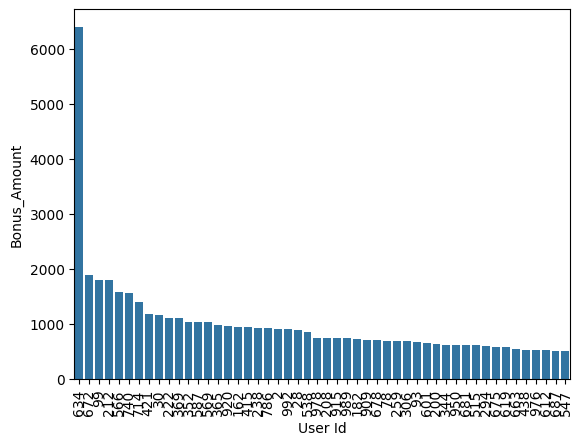

In [252]:
sns.barplot(data = Bonus_Distribution, x='User Id', y='Bonus_Amount')
plt.xticks(rotation=90)